In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [3]:
def deutsch_function(case: int):
    if case not in (1, 2, 3, 4):
        raise ValueError("Case must be 1, 2, 3, or 4")
    f = QuantumCircuit(2)

    if case in [2,3]:
        f.cx(0,1)
    if case in [3,4]:
        f.x(1)

    return f

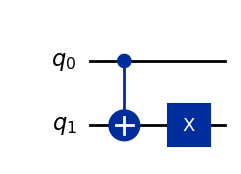

In [4]:
display(deutsch_function(3).draw(output= 'mpl'))

In [5]:
def compile_circuit(function : QuantumCircuit):
    n = function.num_qubits -1 
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace= True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

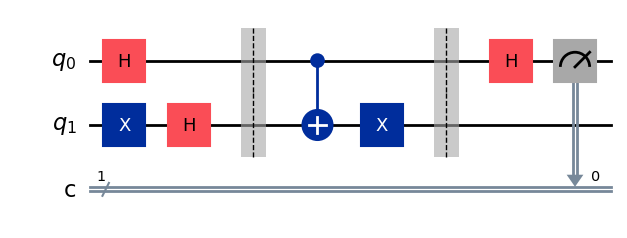

In [6]:
display(compile_circuit(deutsch_function(3)).draw(output= 'mpl'))

In [13]:
def deutsch_algorithm(function : QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots= 1, memory = True).result()
    measurements = result.get_memory()
    if measurements[0] == '0':
        return "Constant"
    return "Balanced"

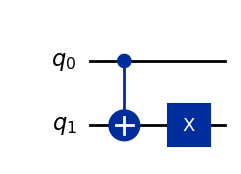

'Balanced'

In [14]:
f = deutsch_function(3)
display(f.draw(output= 'mpl'))
display(deutsch_algorithm(f))